In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout,GlobalMaxPooling2D,BatchNormalization,LayerNormalization

from keras.src.optimizers import SGD
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve



In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
my_data = pd.read_csv('/content/drive/MyDrive/Datasets/A_Z Handwritten Data.csv').astype('float32')

In [ ]:
my_data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
my_data.tail()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372449,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
my_frame = pd.DataFrame(my_data)

In [ ]:
my_frame.shape

(372450, 785)

In [ ]:
my_frame.isnull().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

In [ ]:
# Splitting the data into features (x) and labels (y)


x = my_frame.drop('0', axis = 1)
y = my_frame['0']

In [ ]:
# Splitting the data into training and testing sets, and reshaping the features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=42)
x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

In [ ]:
print('Train Data Shape:', x_train.shape)
print('Test Data Shape:', x_test.shape)

Train Data Shape: (297960, 28, 28)
Test Data Shape: (74490, 28, 28)


In [ ]:
# Dictionary mapping numerical labels to corresponding letters

word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

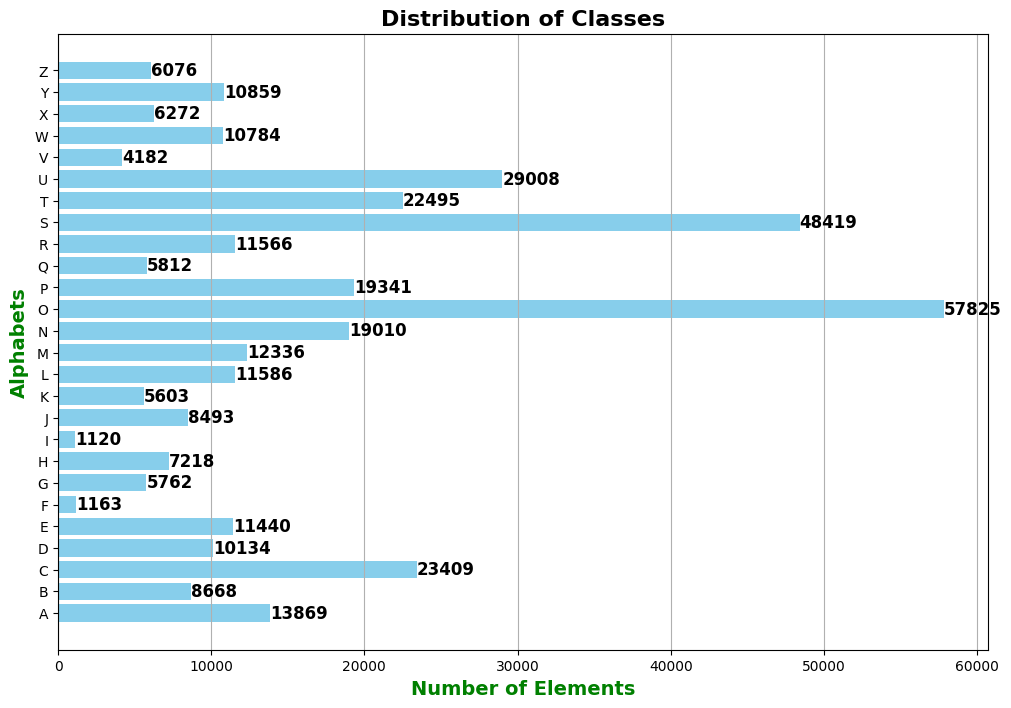

In [ ]:
# Count the occurrences of each class
class_counts = my_frame['0'].value_counts().sort_index()

# Get the list of alphabets
alphabets = [word_dict[i] for i in class_counts.index]

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(alphabets, class_counts, color='skyblue')
plt.xlabel('Number of Elements', fontsize=14, fontweight='bold', color='green')
plt.ylabel('Alphabets', fontsize=14, fontweight='bold', color='green')
plt.title('Distribution of Classes', fontsize=16, fontweight='bold')
plt.grid(axis='x')

# Add count numbers on the bars
for bar, count in zip(bars, class_counts):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{count}',
             va='center', ha='left', fontsize=12, fontweight='bold', color='black')

plt.show()


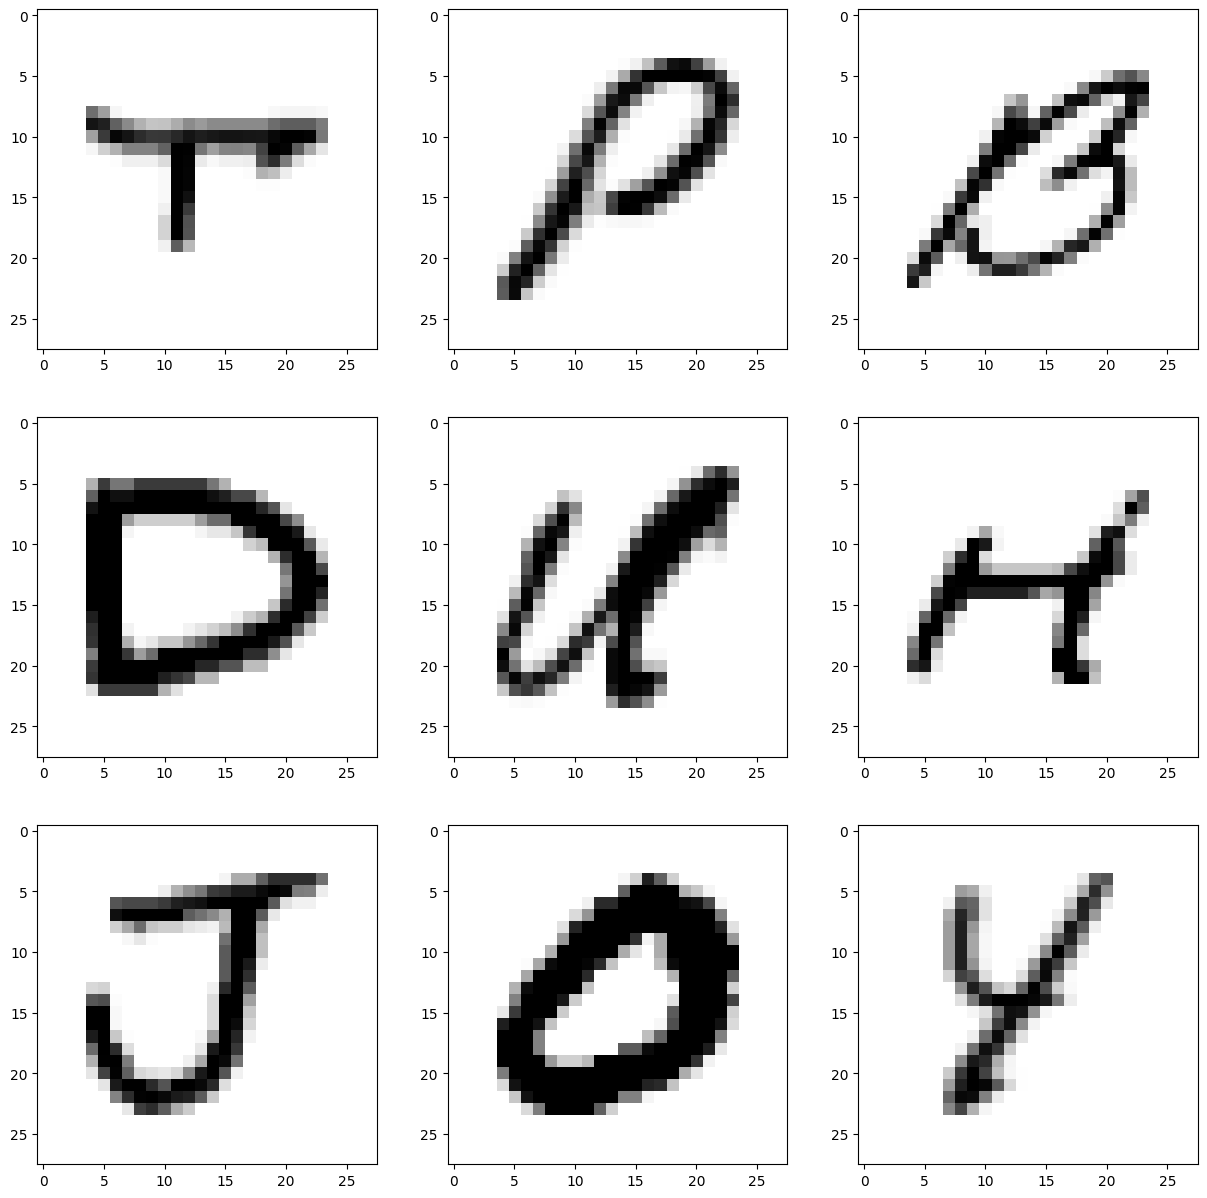

In [ ]:
plt.style.use('fivethirtyeight')
plt.xkcd()
plt.style.use('default')


# Shuffling and plotting a subset of training data samples

shuff = shuffle(x_train[:100])
fig, ax = plt.subplots(3, 3, figsize = (15, 15))
axes = ax.flatten()

for i in range(9):
    shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28, 28)), cmap = 'Greys')
plt.show()

In [ ]:
# Reshaping the training and testing data to add a channel dimension

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
print("New shape of train data:", x_train.shape)

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print("New shape of test data:", x_test.shape)

New shape of train data: (297960, 28, 28, 1)
New shape of test data: (74490, 28, 28, 1)


In [ ]:
# One-hot encoding the training labels and testing labels

categorical_train = to_categorical(y_train, num_classes=26)
print("New shape of train labels:", categorical_train.shape)

categorical_test = to_categorical(y_test, num_classes=26)
print("New shape of test labels:", categorical_test.shape)


New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)


In [ ]:
# Model

my_model = Sequential()

my_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
my_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
my_model.add(MaxPool2D(pool_size=(2, 2)))

my_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
my_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
my_model.add(MaxPool2D(pool_size=(2, 2)))

my_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='valid'))
my_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
my_model.add(GlobalMaxPooling2D())

my_model.add(Dense(64, activation="relu"))
my_model.add(Dropout(0.5))
my_model.add(Dense(128, activation="relu"))
my_model.add(Dropout(0.5))

my_model.add(Dense(26, activation="softmax"))

In [ ]:
# Compiling the model

my_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the model on the training data and validating on the testing data
history = my_model.fit(x_train, categorical_train, epochs = 50, validation_data = (x_test, categorical_test))

Epoch 1/50
9312/9312 [==============================] - 76s 7ms/step - loss: 0.3642 - accuracy: 0.9008 - val_loss: 0.0841 - val_accuracy: 0.9813
Epoch 2/50
9312/9312 [==============================] - 70s 8ms/step - loss: 0.1561 - accuracy: 0.9623 - val_loss: 0.0888 - val_accuracy: 0.9800
Epoch 3/50
9312/9312 [==============================] - 66s 7ms/step - loss: 0.1318 - accuracy: 0.9686 - val_loss: 0.0776 - val_accuracy: 0.9821
Epoch 4/50
9312/9312 [==============================] - 73s 8ms/step - loss: 0.1224 - accuracy: 0.9711 - val_loss: 0.0596 - val_accuracy: 0.9869
Epoch 5/50
9312/9312 [==============================] - 80s 9ms/step - loss: 0.1132 - accuracy: 0.9734 - val_loss: 0.0633 - val_accuracy: 0.9865
Epoch 6/50
9312/9312 [==============================] - 75s 8ms/step - loss: 0.1108 - accuracy: 0.9742 - val_loss: 0.0638 - val_accuracy: 0.9868
Epoch 7/50
9312/9312 [==============================] - 76s 8ms/step - loss: 0.1083 - accuracy: 0.9745 - val_loss: 0.0649 - val_ac

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


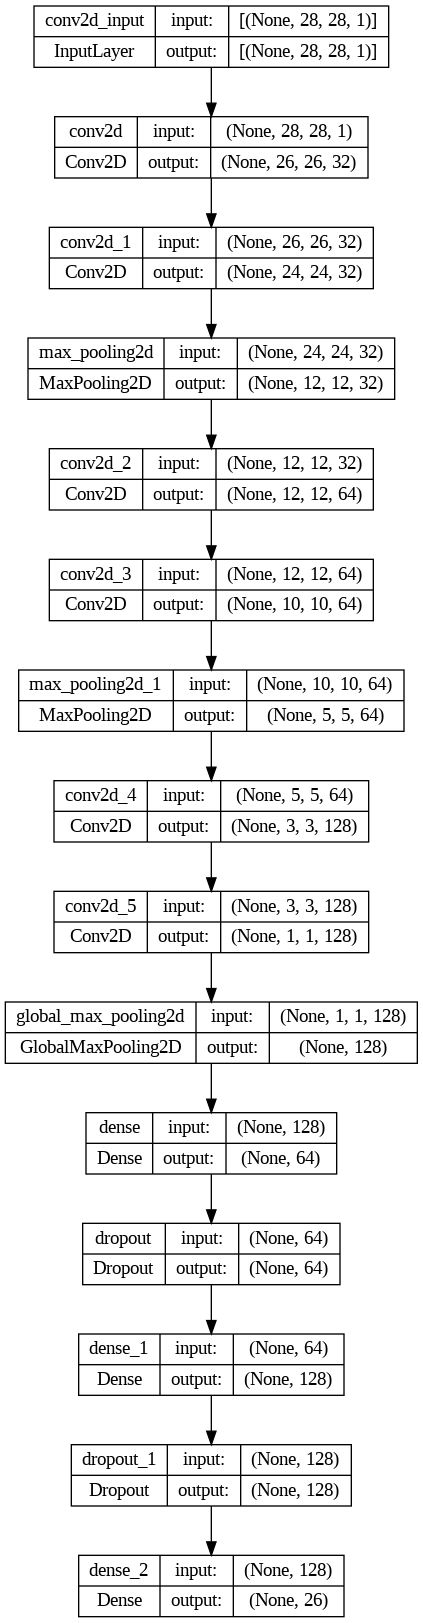

In [ ]:
# Model Summary
my_model.summary()

my_model.save(r'model_GMP-50.h5')

from keras.utils import plot_model

# Visualizing the model architecture and saving it to an image file
plot_model(my_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9813129305839539, 0.9799838662147522, 0.9820915460586548, 0.9869378209114075, 0.9865351319313049, 0.9867632985115051, 0.9862129092216492, 0.9860920906066895, 0.9836219549179077, 0.9868707060813904, 0.9857296347618103, 0.9875016808509827, 0.986078679561615, 0.9885488152503967, 0.9866156578063965, 0.9821721315383911, 0.9862129092216492, 0.9864411354064941, 0.9856893420219421, 0.9862934350967407, 0.9860383868217468, 0.9870049953460693, 0.9863337278366089, 0.9837024807929993, 0.9837830662727356, 0.9839978814125061, 0.9864814281463623, 0.9587461352348328, 0.9801583886146545, 0.9850584268569946, 0.9802926778793335, 0.983501136302948, 0.9756880402565002, 0.9835682511329651, 0.983501136302948, 0.9759699106216431, 0.9864948391914368, 0.9840112924575806, 0.9810310006141663, 0.9783058166503906, 0.9821855425834656, 0.9792455434799194, 0.9780910015106201, 0.9832192063331604, 0.9805880188941956, 0.982749342918396, 0.9826285243034363, 0.9811115860939026, 0.977849364280

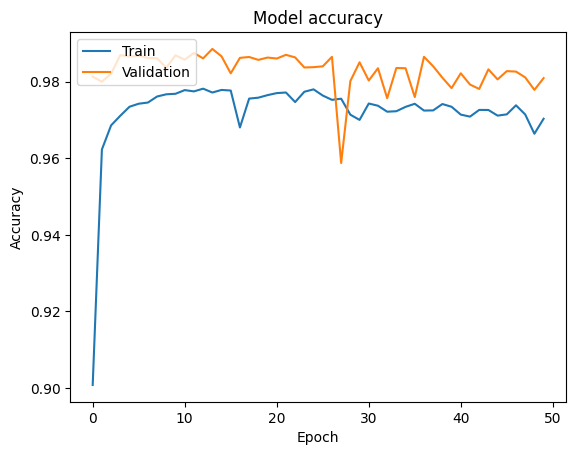

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

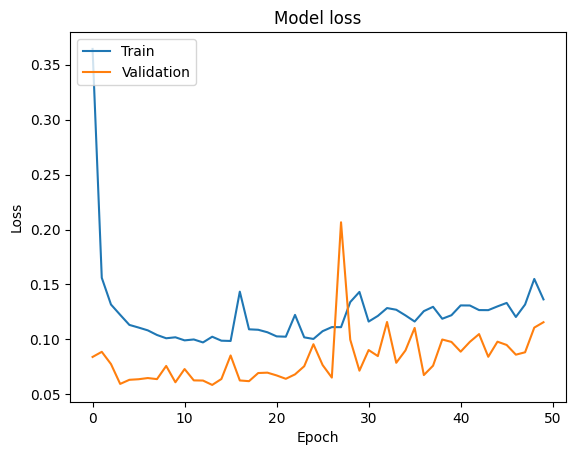

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

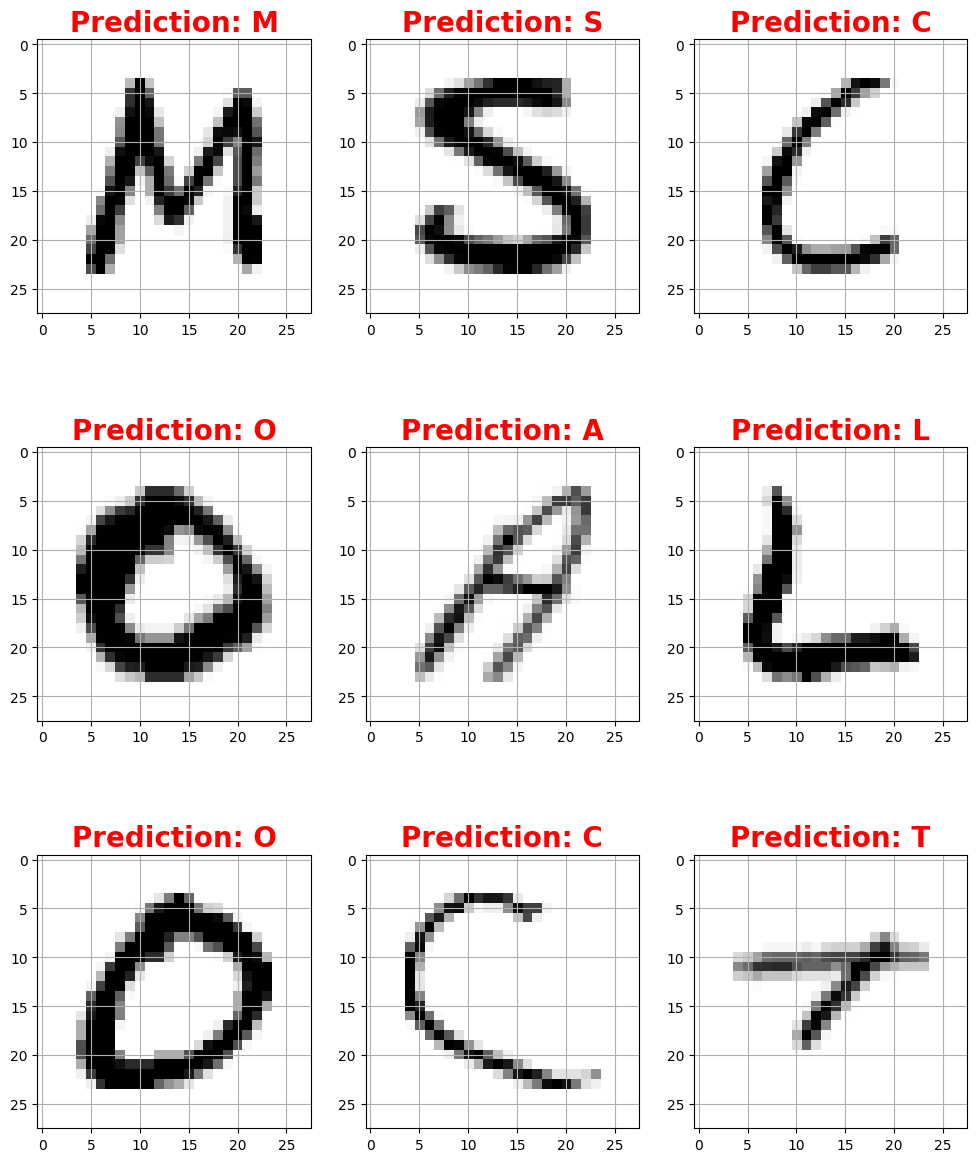

In [ ]:
plt.style.use('fivethirtyeight')
plt.xkcd()
plt.style.use('default')

# Creating subplots for displaying images and predictions
fig, axes = plt.subplots(3, 3, figsize = (12, 15))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(x_test[i], (28, 28))
    ax.imshow(img, cmap = 'Greys')

    pred = word_dict[np.argmax(categorical_test[i])]
    ax.set_title("Prediction: " + pred, fontsize = 20, fontweight = 'bold', color = 'red')
    ax.grid()

2328/2328 [==============================] - 6s 2ms/step
Confusion Matrix:
[[71646    38]
 [   49  2757]]
Accuracy: 0.9988320579943617
Precision: 0.9864042933810375
Recall: 0.9825374198146828
F1 Score: 0.984467059453669


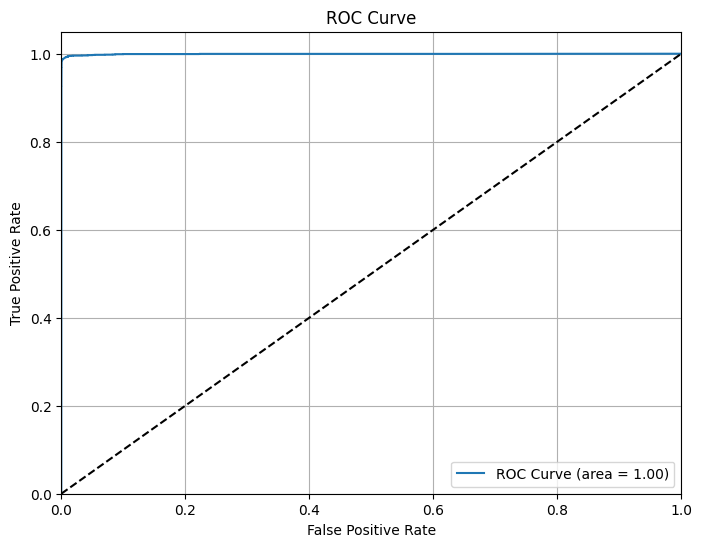

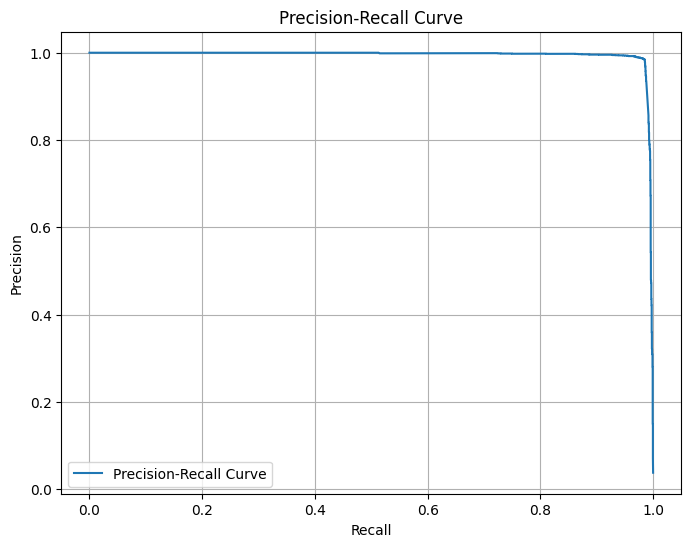

In [ ]:

# Evaluate the model on test data
y_pred = my_model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)  # Predicted class labels

# One-vs-Rest Classification (choose a class for binary classification)
target_class = 0  # Modify this to the class you want binary classification for (0-25)

# Binarize predictions for the target class
y_test_binary = (y_test == target_class).astype(int)
y_pred_binary = (y_pred_class == target_class).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)
print("Confusion Matrix:")
print(cm)

# Accuracy, Precision, Recall, F1 Score
accuracy = np.mean((y_test_binary == y_pred_binary))
precision = np.sum((y_pred_binary * y_test_binary)) / np.sum(y_pred_binary)
recall = np.sum((y_pred_binary * y_test_binary)) / np.sum(y_test_binary)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred[:, target_class])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_pred[:, target_class])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import f1_score


# Evaluate the model
y_pred = my_model.predict(x_test)
y_pred_int = np.argmax(y_pred, axis=1)
y_test_int = np.argmax(categorical_test, axis=1)

precision = precision_score(y_test_int, y_pred_int, average='weighted')
recall = recall_score(y_test_int, y_pred_int, average='weighted')
f1_score_value = f1_score(y_test_int, y_pred_int, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score_value)


2328/2328 [==============================] - 5s 2ms/step
Precision: 0.9810609724120121
Recall: 0.980923613907907
F1-score: 0.980895851455309


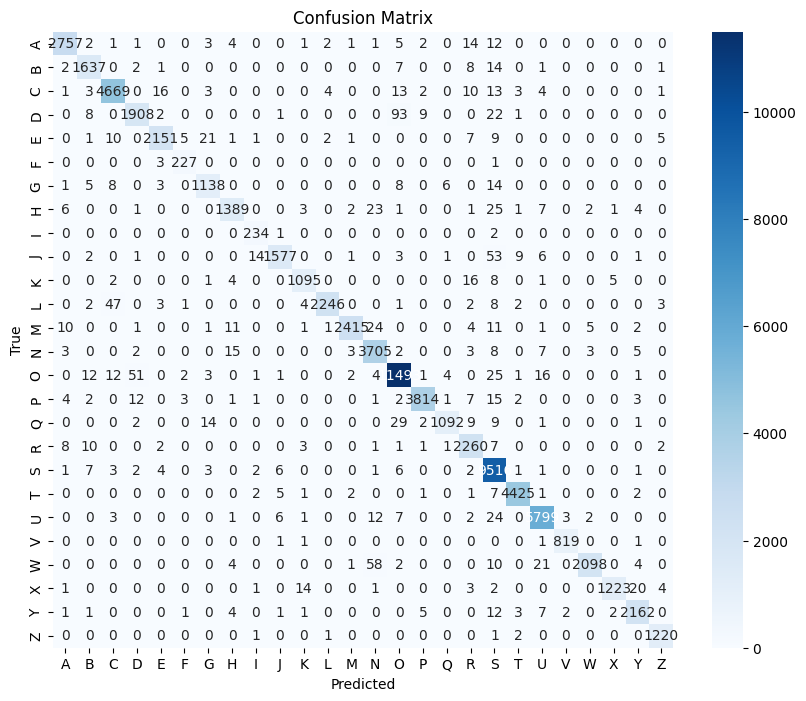

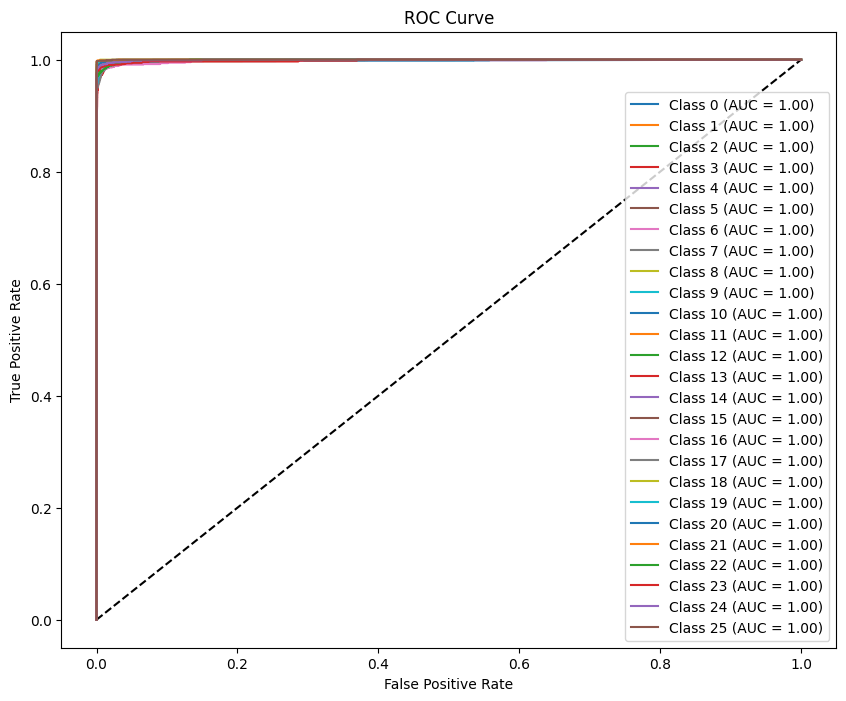

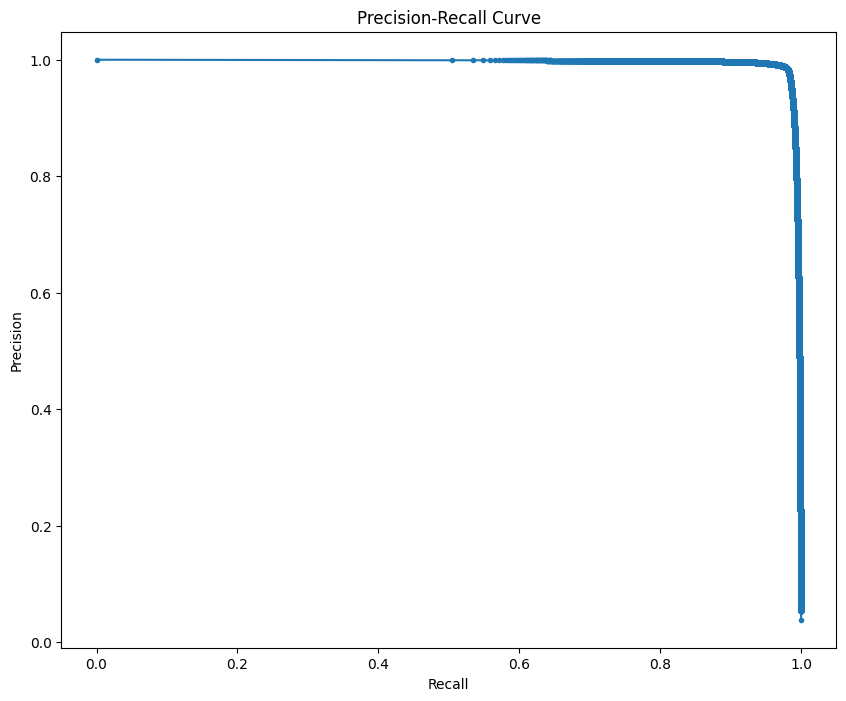

In [ ]:
conf_matrix = confusion_matrix(y_test_int, y_pred_int)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=alphabets, yticklabels=alphabets)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(26):
    fpr[i], tpr[i], _ = roc_curve(categorical_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(26):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

precision_, recall_, _ = precision_recall_curve(categorical_test.ravel(), y_pred.ravel())

plt.figure(figsize=(10, 8))
plt.plot(recall_, precision_, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()